# Q2.4: Autoencoder on Wine Dataset (3-Neuron Bottleneck)

Train an autoencoder on the Wine dataset with a **3-neuron bottleneck**.

**Exam outputs:** loss vs epochs and reconstruction error (MSE).

## Step 1: Import Libraries

In [1]:
# Install tensorflow if not already installed (this line should be executed first)
try:
    import tensorflow
except ImportError:
    print("TensorFlow not found. Installing now...")
    !pip install tensorflow
    print("TensorFlow installed. Please restart the runtime to ensure all imports work correctly.")

TensorFlow not found. Installing now...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 744.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 156.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.3 MB/s eta 0:00:00
TensorFlow installed. Please restart the runtime to ensure all imports work correctly.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


## Step 2: Load and Normalize Data

In [3]:
wine = load_wine()
X = wine.data

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

print(f"Data Shape: {X_norm.shape}")
print(f"Features: {wine.feature_names}")

Data Shape: (178, 13)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## Step 3: Build Autoencoder with 3 Neurons

In [4]:
inp = Input(shape=(X_norm.shape[1],))
encoded = Dense(3, activation='relu', name='bottleneck')(inp)
decoded = Dense(X_norm.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inp, decoded)
encoder = Model(inp, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 13)             │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94 (376.00 B)

 Trainable params: 94 (376.00 B)

 Non-trainable params: 0 (0.00 B)

## Step 4: Train Autoencoder

In [5]:
history = autoencoder.fit(X_norm, X_norm,
                          epochs=150,
                          batch_size=16,
                          shuffle=True,
                          verbose=1)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0562  
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0538 
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0545 
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0517 
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0533 
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0522 
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0503 
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0488 
Epoch 9/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0486 
Epoch 10/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0474 
Epoch 11/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0479 
Epoch 12/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0467 
Epoch 13/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0436 
Epoch 14/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454 
Epoch 15/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

## Step 5: Display Encoded Representation

In [6]:
encoded_data = encoder.predict(X_norm, verbose=0)
print(f"\nEncoded Data Shape: {encoded_data.shape}")
print(f"Compressed: {X_norm.shape[1]} features -> 3 features")
print(f"\nFirst 10 encoded samples:\n{encoded_data[:10]}")


Encoded Data Shape: (178, 3)
Compressed: 13 features -> 3 features

First 10 encoded samples:
[[1.2403687 0.        1.7921337]
 [1.1000534 0.        1.6139077]
 [1.0623152 0.        1.495476 ]
 [0.8070195 0.        2.4164293]
 [1.0313003 0.        0.7877478]
 [0.984701  0.        1.9376204]
 [1.0913968 0.        1.7041897]
 [0.9681275 0.        1.5148042]
 [1.2011145 0.        1.638191 ]
 [1.107763  0.        1.869513 ]]


## Step 6: Calculate Loss and Plot

### Plot Training Loss vs Epochs

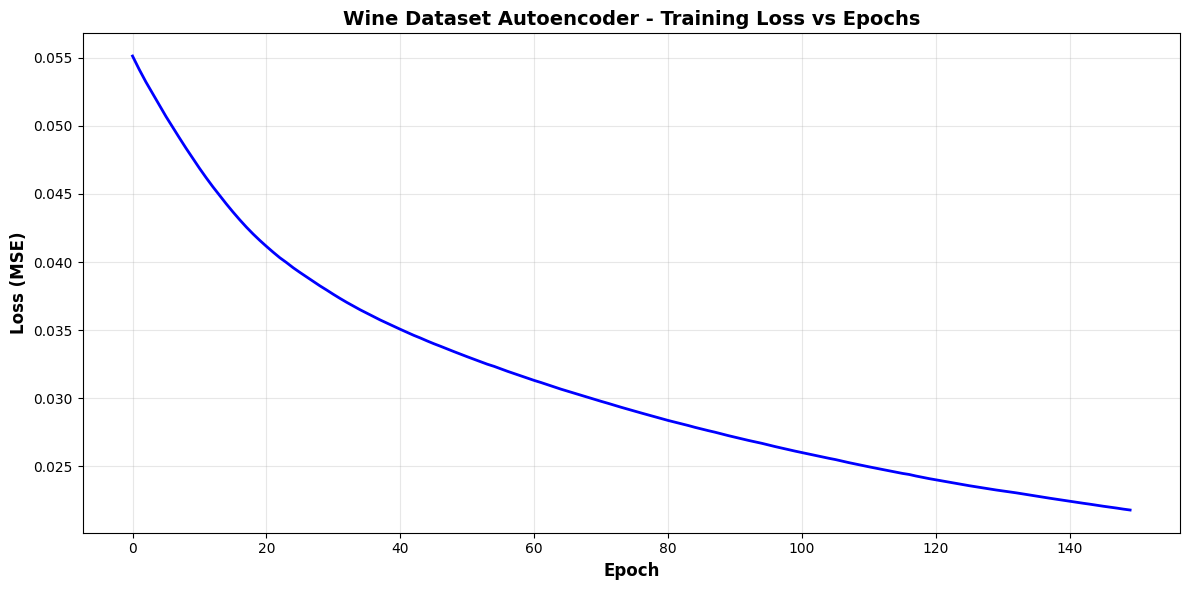

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], linewidth=2, color='blue')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('Wine Dataset Autoencoder - Training Loss vs Epochs', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Display Loss Statistics

In [8]:
print(f"\nInitial Loss (Epoch 1): {history.history['loss'][0]:.6f}")
print(f"Final Loss (Epoch {len(history.history['loss'])}): {history.history['loss'][-1]:.6f}")
print(f"Loss Reduction: {(history.history['loss'][0] - history.history['loss'][-1]):.6f}")


Initial Loss (Epoch 1): 0.055113
Final Loss (Epoch 150): 0.021805
Loss Reduction: 0.033308


## Step 7: Calculate Reconstruction Error

In [9]:
decoded_data = autoencoder.predict(X_norm, verbose=0)
mse = np.mean((X_norm - decoded_data) ** 2)
print(f"\nReconstruction MSE: {mse:.6f}")


Reconstruction MSE: 0.021760


## Summary

**Key Results:**
- Compressed 13 wine features to 3 dimensions
- Loss decreases over epochs showing learning progress
- Lower final loss indicates better reconstruction